In [3]:
pip install pandas scikit-learn matplotlib svm 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
  Created wheel for svm: filename=svm-0.1.0-py3-none-any.whl size=3502 sha256=f73a2e1c3b5a33035578831db3ae04d7f6ef2350ea447667a0b0c84bc5fa1d5e
  Stored in directory: /Users/anyakhurana/Library/Caches/pip/wheels/ad/03/97/f9c7f9c1ea8f72e77bd49a82b66ad71e5d37a0d64cf2f2b5ea
Successfully built svm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [svm]4/8 [charset_normalizer]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# importing libraries so there is no error

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification    
from sklearn.model_selection import train_test_split
import joblib
OSError
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import joblib
import sys
import os
import pandas as pd
import argparse
import warnings
warnings.filterwarnings("ignore")
import argparse
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification




In [22]:
##############################################NEW SECTION OF CODE. - BALANCE THE CODE TO ENSURE ACCURACY  #####################################################

# Load dataset
df = pd.read_csv("/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance.csv")

# Target encoding
y = df['Resistance'].map({'S': 0, 'R': 1}).astype(int)

# One-hot encode features
X = df.drop(columns=['ID', 'Resistance'])
X = pd.get_dummies(X, drop_first=False)

# Stratified CV for fairness
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Class balance:", y.value_counts(normalize=True))
print("X shape:", X.shape)


############################################## SAVE THE MODEL TO NEW PATH ###############################################################################################

## Prepares data for the ML Models
# Define the path to save the model
model_path = "/Users/anyakhurana/Documents/Rpo_analysis_project/rpoABC_variation_rifampicin_resistance_model.pkl"
# Check if the model already exists
if os.path.exists(model_path):
    print("Model already exists. Loading the model...")
    model = joblib.load(model_path)
else:  
    print("Model does not exist. Creating a new model...")
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Create a pipeline with scaling and classifier
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    
    # Fit the model
    pipeline.fit(X, y)
    
    # Save the model
    joblib.dump(pipeline, model_path)
    print(f"Model saved to {model_path}")


############################################## # fair and repeatable 10-fold cross-validation that preserves class balance,##############################################################################################

from sklearn.model_selection import StratifiedKFold
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


############################################## # DEFINE THE SVM PIPELINE ##############################################################################################

svm_pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC(probability=True, random_state=42))
])


##############################################TRAIN AND TEST DATA##############################################################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,     
    random_state=42
)
print("Training set class balance:", y_train.value_counts(normalize=True))
print("Test set class balance:", y_test.value_counts(normalize=True))




############################################## HYPERTUNE THE SVM ##############################################################################################



import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Prepare Data
X = df.drop(columns=['ID', 'Resistance'])
y = df['Resistance']
X_encoded = pd.get_dummies(X)

# Parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC(probability=True, random_state=42)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_encoded, y)

print("Best Parameters (SVM):", random_search.best_params_)
print("Best CV Accuracy (SVM):", random_search.best_score_)


############################################## CROSS-VALIDATE THE SVM - 10 FOLD SPLIT ##############################################################################################


from sklearn.model_selection import cross_val_score

best_params_svm = random_search.best_params_

svm_best = SVC(**best_params_svm, probability=True, random_state=42)

cv_10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_svm = cross_val_score(svm_best, X_encoded, y, cv=cv_10)

print("Cross-validation accuracies (SVM):", scores_svm)
print("Average accuracy (SVM):", np.mean(scores_svm))



############################################## FINAL GRAPH CLASS ##############################################################################################



from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

model_svm = SVC(**best_params_svm, probability=True, random_state=42)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))





Class balance: Resistance
1    0.5
0    0.5
Name: proportion, dtype: float64
X shape: (98, 197)
Model already exists. Loading the model...
Training set class balance: Resistance
0    0.5
1    0.5
Name: proportion, dtype: float64
Test set class balance: Resistance
1    0.5
0    0.5
Name: proportion, dtype: float64
Best Parameters (SVM): {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
Best CV Accuracy (SVM): 0.9384210526315788
Cross-validation accuracies (SVM): [1.         1.         1.         1.         1.         0.9
 1.         0.9        0.77777778 1.        ]
Average accuracy (SVM): 0.9577777777777777
Accuracy (SVM): 0.95
              precision    recall  f1-score   support

           R       1.00      0.90      0.95        10
           S       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



## Confused Matrix Code

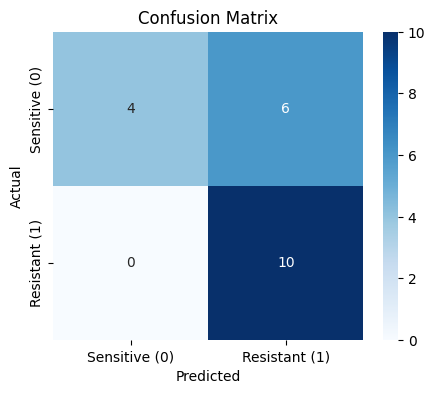

In [28]:
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sensitive (0)', 'Resistant (1)'],
            yticklabels=['Sensitive (0)', 'Resistant (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()